In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
flight_data = pd.read_csv('flights.csv')

In [3]:
flight_data.head(12)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [4]:
flight_data['year'].max()

1960

In [5]:
month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [6]:
def spojovac(year,month):
    mesic = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    month = str(mesic[month])
    year = str(year)
    a = year+'-'+month+'-01'
    a = pd.to_datetime(a)
    return a

In [7]:
list_let = []
for i in range(len(flight_data)):
    list_let.append(spojovac(flight_data['year'][i],flight_data['month'][i]))

In [8]:
print(list_let[0])
print(flight_data['year'][0])
print(flight_data['month'][0])

1949-01-01 00:00:00
1949
January


In [9]:
flight_data['date']=list_let

In [10]:
mesic = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
list_mont=[]
for i in range(len(flight_data)):
    list_mont.append(mesic[flight_data['month'][i]])
    
flight_data['month2']=list_mont

In [11]:
flight_data.head(1)

,year,month,passengers,date,month2
0,1949,January,112,1949-01-01,1


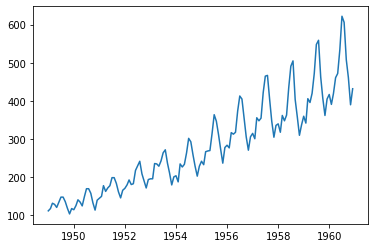

In [12]:
plt.plot(flight_data['date'],flight_data['passengers'])

In [13]:
X = flight_data.drop(['passengers','month','date'],axis=1)
y = flight_data['passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin = LinearRegression()
lin.fit(X_train,y_train)
prediction = lin.predict(X_test)
print(mean_squared_error(y_test, prediction))
print(lin)

1892.9307089212473
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
df = flight_data[['date','passengers']]

In [15]:
df = df.set_index('date')

In [16]:
df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
#len(df)
df.shape

(144, 1)

In [18]:
test_size = 18
test_ind = len(df)-test_size
test_ind

126

In [19]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [21]:
train.shape

(126, 1)

In [20]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train, length=length, batch_size=1)

In [25]:
X,y = generator[0]

In [26]:
n_feature = 1

In [42]:
model = Sequential()
model.add(LSTM(500,activation='relu',input_shape=(length, n_feature)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 500)               1004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [43]:
early = EarlyStopping(monitor = 'val_loss', patience = 40)
validation_gen = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [59]:
model.fit_generator(generator, epochs=200, 
                   validation_data=validation_gen)

Epoch 1/200
114/114 [==============================] - 21s 187ms/step - loss: 4.0267e-04 - val_loss: 0.0159
Epoch 2/200
114/114 [==============================] - 18s 158ms/step - loss: 4.1289e-04 - val_loss: 0.0113
Epoch 3/200
114/114 [==============================] - 22s 194ms/step - loss: 3.8321e-04 - val_loss: 0.0155
Epoch 4/200
114/114 [==============================] - 26s 229ms/step - loss: 4.6358e-04 - val_loss: 0.0098
Epoch 5/200
114/114 [==============================] - 22s 192ms/step - loss: 5.8970e-04 - val_loss: 0.0086
Epoch 6/200
114/114 [==============================] - 22s 195ms/step - loss: 4.8908e-04 - val_loss: 0.0091
Epoch 7/200
114/114 [==============================] - 22s 195ms/step - loss: 5.7078e-04 - val_loss: 0.0140
Epoch 8/200
114/114 [==============================] - 20s 174ms/step - loss: 5.0322e-04 - val_loss: 0.0111
Epoch 9/200
114/114 [==============================] - 21s 186ms/step - loss: 4.5792e-04 - val_loss: 0.0260
Epoch 10/200
114/114 [======

114/114 [==============================] - 20s 179ms/step - loss: 1.8847e-04 - val_loss: 0.0055
Epoch 86/200
114/114 [==============================] - 20s 178ms/step - loss: 1.8076e-04 - val_loss: 0.0076
Epoch 87/200
114/114 [==============================] - 19s 166ms/step - loss: 1.9580e-04 - val_loss: 0.0092
Epoch 88/200
114/114 [==============================] - 23s 203ms/step - loss: 1.6331e-04 - val_loss: 0.0055
Epoch 89/200
114/114 [==============================] - 20s 174ms/step - loss: 2.1302e-04 - val_loss: 0.0131
Epoch 90/200
114/114 [==============================] - 19s 168ms/step - loss: 7.5999e-04 - val_loss: 0.0100
Epoch 91/200
114/114 [==============================] - 19s 169ms/step - loss: 3.5601e-04 - val_loss: 0.0126
Epoch 92/200
114/114 [==============================] - 19s 167ms/step - loss: 2.3486e-04 - val_loss: 0.0139
Epoch 93/200
114/114 [==============================] - 19s 165ms/step - loss: 2.0569e-04 - val_loss: 0.0044
Epoch 94/200
114/114 [==========

114/114 [==============================] - 21s 181ms/step - loss: 5.6984e-05 - val_loss: 0.0065
Epoch 171/200
114/114 [==============================] - 18s 161ms/step - loss: 6.4614e-05 - val_loss: 0.0093
Epoch 172/200
114/114 [==============================] - 19s 165ms/step - loss: 6.2745e-05 - val_loss: 0.0073
Epoch 173/200
114/114 [==============================] - 18s 160ms/step - loss: 1.1199e-04 - val_loss: 0.0152
Epoch 174/200
114/114 [==============================] - 18s 161ms/step - loss: 1.0513e-04 - val_loss: 0.0097
Epoch 175/200
114/114 [==============================] - 21s 186ms/step - loss: 1.0197e-04 - val_loss: 0.0110
Epoch 176/200
114/114 [==============================] - 26s 226ms/step - loss: 1.7003e-04 - val_loss: 0.0196
Epoch 177/200
114/114 [==============================] - 21s 183ms/step - loss: 1.9701e-04 - val_loss: 0.0095
Epoch 178/200
114/114 [==============================] - 21s 180ms/step - loss: 2.7884e-04 - val_loss: 0.0180
Epoch 179/200
114/114 [=

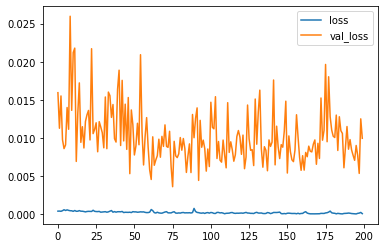

In [60]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [61]:
tested=[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_feature))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    tested.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [62]:
true_pred = scaler.inverse_transform(tested)
test['Prediction'] = true_pred

C:\Users\gelelety\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


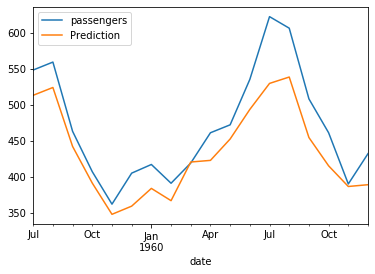

In [63]:
test.plot()

In [ ]:
#from last chart we can see, that model is quite good but not perfect. 
#we can use this for future prediction, but we can only predict annual change and yearly increased of travelling, but we...
#... we cannot 